In [63]:
from functools import partial

import numpy as np
import pandas as pd
from scipy.special import beta, betainc
from numpy.polynomial import Polynomial

<Axes: >

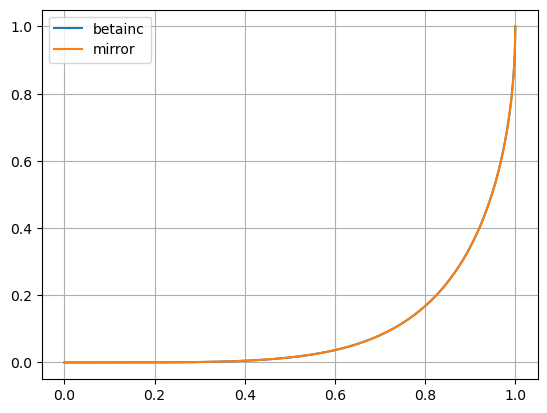

In [67]:
a = 4.5
b = 0.5
x = np.linspace(0, 1, 1001)
y = betainc(a, b, x)
ym = 1 - betainc(b, a, 1 - x)
pd.DataFrame({"betainc": y, "mirror": ym}, index=x).plot(grid=True)

In [7]:
poly = Polynomial.fit(x, y, 40, domain=[0, 1], window=[0, 1])
poly

/home/crusaderky/miniforge3/envs/pyscenarios/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Polynomial([ 9.06920151e-04, -3.35522142e-01,  2.88287534e+01, -1.05833145e+03,
        2.09195197e+04, -2.50197496e+05,  1.92969984e+06, -9.89960544e+06,
        3.38653403e+07, -7.44510449e+07,  9.18912706e+07, -2.69613148e+07,
       -7.20457108e+07,  4.51157397e+07,  7.11369125e+07, -2.72044724e+07,
       -8.17832297e+07, -1.99727035e+07,  6.75582509e+07,  7.43426970e+07,
       -1.57110455e+06, -7.65995930e+07, -7.73179116e+07, -5.72779320e+06,
        7.26754120e+07,  9.05507673e+07,  3.30811911e+07, -5.38272788e+07,
       -1.01135592e+08, -6.94245070e+07,  2.05012032e+07,  9.99867114e+07,
        1.01470464e+08,  1.34957591e+07, -9.73327252e+07, -1.24503025e+08,
       -1.43975831e+07,  1.39427222e+08,  1.08447931e+08, -1.90497268e+08,
        5.94062003e+07], domain=[0., 1.], window=[0., 1.], symbol='x')

<Axes: >

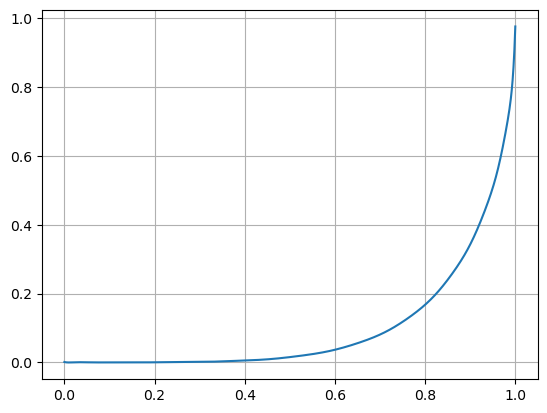

In [8]:
yf = (x[:, None]**np.arange(41) * poly.coef).sum(axis=1)
pd.Series(yf, index=x).plot(grid=True)

<Axes: >

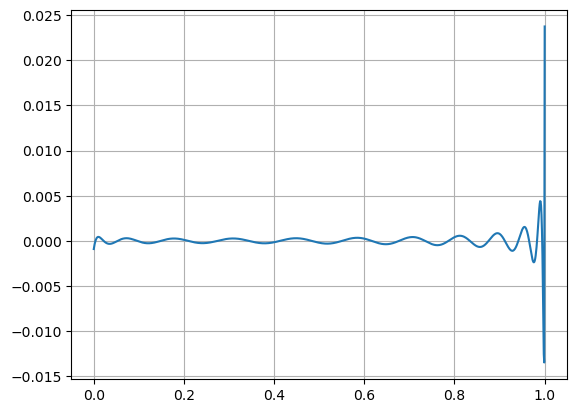

In [9]:
pd.Series(y - yf, index=x).plot(grid=True)

/home/crusaderky/miniforge3/envs/pyscenarios/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/home/crusaderky/miniforge3/envs/pyscenarios/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


<Axes: >

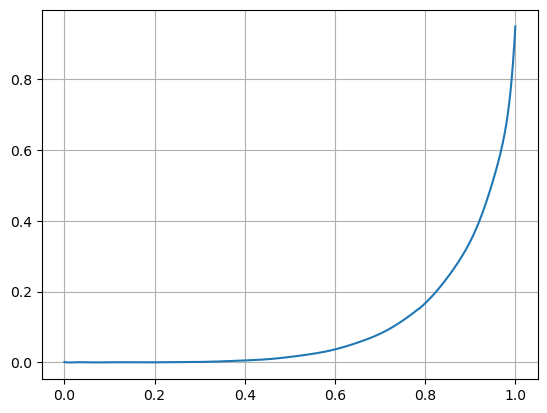

In [61]:
xlim = (a + 1) / (a + b + 2)
x = np.linspace(0, 1, 1001)
y = betainc(a, b, x)
ym = 1 - betainc(b, a, 1 - x)
poly1 = Polynomial.fit(x, y, 40, domain=[0, 1], window=[0, 1])
poly2 = Polynomial.fit(1 - x, ym, 40, domain=[0, 1], window=[0, 1])

converges_rapidly = x < xlim
aa = np.where(converges_rapidly, a, b)
bb = np.where(converges_rapidly, b, a)
xx = np.where(converges_rapidly, x, 1 - x)
yf1 = (xx[:, None]**np.arange(41) * poly1.coef).sum(axis=1)
yf2 = (xx[:, None]**np.arange(41) * poly2.coef).sum(axis=1)
yf = np.where(converges_rapidly, yf1, yf2)
pd.Series(yf, index=x).plot(grid=True)

<Axes: >

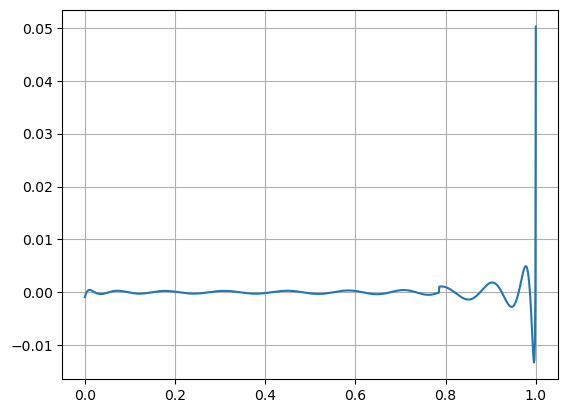

In [62]:
pd.Series(y - yf, index=x).plot(grid=True)